<a href="https://colab.research.google.com/github/nadiataoufik/Census_income-/blob/master/car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# import libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


In [6]:
#load data 
raw_data=pd.read_csv('/content/drive/MyDrive/1.04.+Real-life+example.csv')

In [7]:
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [8]:
raw_data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [9]:
raw_data.shape

(4345, 9)

In [10]:
data=raw_data.drop(['Model'],axis=1)

In [11]:
# dealing with missing values 
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [12]:
data=data.dropna(axis=0)

In [13]:
data.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
dtype: int64

In [14]:
data_no_nv=data.dropna(axis=0)

In [15]:
data_no_nv.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
dtype: int64

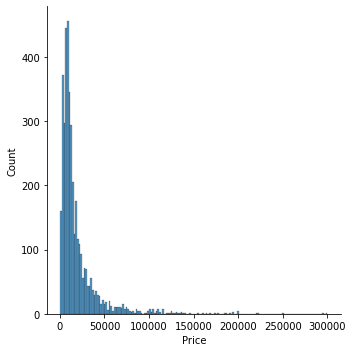

In [16]:
sns.displot(data_no_nv['Price'])

In [17]:
# we have outliers we need to remove it because it will affect the regression 
# remove top 1 % : quantile method 
q=data_no_nv['Price'].quantile(0.99)

In [18]:
data1=data_no_nv[data_no_nv['Price']<q]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


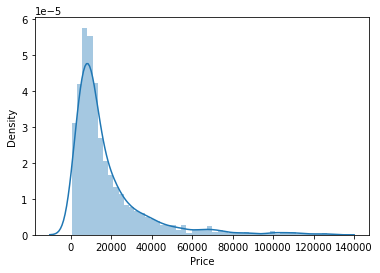

In [19]:
sns.distplot(data1['Price'])

In [20]:
data1.describe()

,Price,Mileage,EngineV,Year
count,3984.000000,3984.000000,3984.000000,3984.000000
mean,17837.117460,165.116466,2.743770,2006.292922
std,18976.268315,102.766126,4.956057,6.672745
min,600.000000,0.000000,0.600000,1969.000000
25%,6980.000000,93.000000,1.800000,2002.750000
50%,11400.000000,160.000000,2.200000,2007.000000
75%,21000.000000,230.000000,3.000000,2011.000000
max,129222.000000,980.000000,99.990000,2016.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


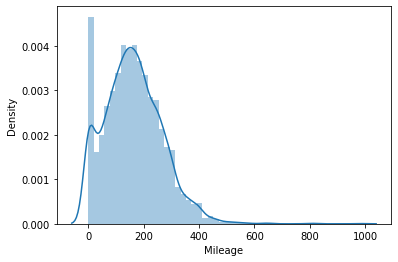

In [21]:
sns.distplot(data_no_nv['Mileage'])

In [22]:
q1=data_no_nv['Mileage'].quantile(0.99)

In [23]:
data2=data1[data1['Mileage']<q1]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


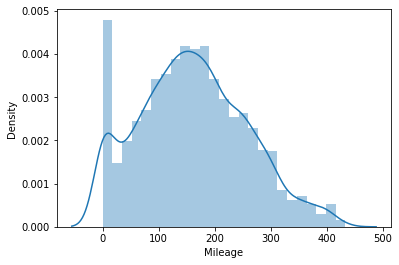

In [24]:
sns.distplot(data2['Mileage'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


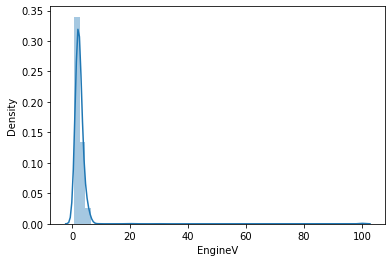

In [25]:
#engine volume 
sns.distplot(data_no_nv['EngineV'])

In [26]:
data3=data2[data2['EngineV']<6.5]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


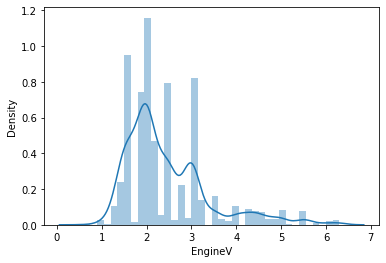

In [27]:
sns.distplot(data3['EngineV'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


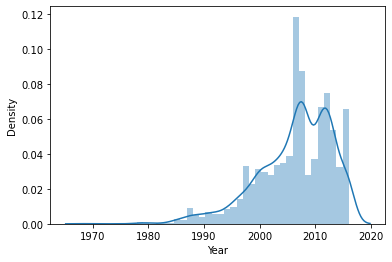

In [28]:
sns.distplot(data_no_nv['Year'])

In [29]:
q3=data_no_nv['Year'].quantile(0.01)

In [30]:
data4=data3[data3['Year']>q3]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


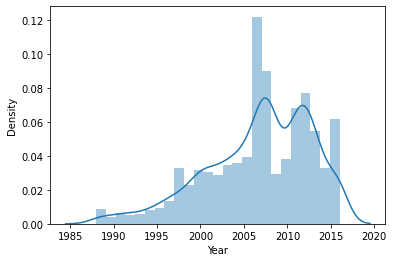

In [31]:
sns.distplot(data4['Year'])

In [32]:
#reset index 
data_cleaned=data4.reset_index(drop=True)

In [33]:
data_cleaned.describe()

,Price,Mileage,EngineV,Year
count,3866.000000,3866.000000,3866.000000,3866.000000
mean,18197.480629,160.471547,2.450246,2006.713140
std,19087.396949,95.543697,0.949413,6.101235
min,800.000000,0.000000,0.600000,1988.000000
25%,7200.000000,91.000000,1.800000,2003.000000
50%,11700.000000,157.000000,2.200000,2008.000000
75%,21700.000000,225.000000,3.000000,2012.000000
max,129222.000000,433.000000,6.300000,2016.000000


Text(0.5, 1.0, 'Engine volume and price ')

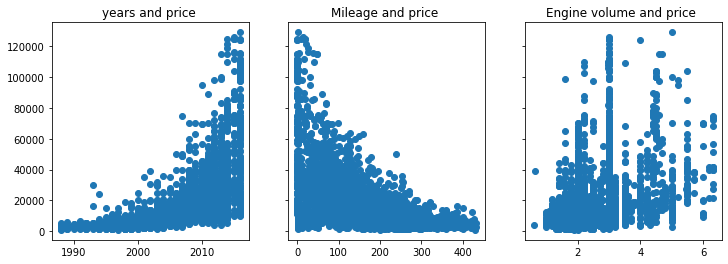

In [34]:
#check OLS assumptions 
#1. check the linearity 

f,(ax1,ax2,ax3)=plt.subplots(1,3,sharey=True,figsize=(12,4))
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('years and price ')
ax2.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax2.set_title('Mileage and price ')
ax3.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax3.set_title('Engine volume and price ')

In [35]:
# use log transformation : expo 
# relaxing the assumptions 
log_price=np.log(data_cleaned['Price'])
data_cleaned['log_price']=log_price
data_cleaned.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656


Text(0.5, 1.0, 'engine and price ')

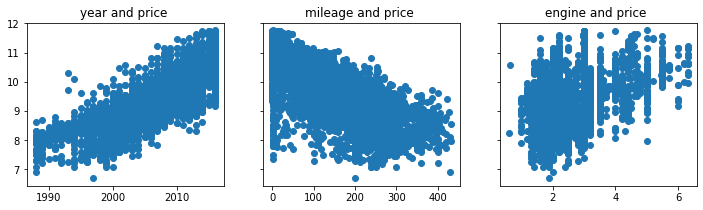

In [36]:
#data visualization 
f,(ax1,ax2,ax3)=plt.subplots(1,3,sharey=True,figsize=(12,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('year and price ')
ax2.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax2.set_title('mileage and price ')
ax3.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax3.set_title('engine and price ')

In [37]:
data_cleaned=data_cleaned.drop(['Price'],axis=1)

In [38]:
#no endogeneity 
# normality and homoscedasticity(normality ,zero mean )
#no autocorrelation : no time series data >observations are not dependents on each others 
#multicollinearity 
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [39]:
# check the multicollinearity 
from statsmodels.stats.outliers_influence import variance_inflation_factor

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [40]:
variable=data_cleaned[['Mileage','Year','EngineV']]

In [41]:
vif=pd.DataFrame()

In [42]:
vif['VIF']=[variance_inflation_factor(variable.values,i) for i in range(variable.shape[1])]
vif['features']=variable.columns 

In [43]:
vif

,VIF,features
0,3.794319,Mileage
1,10.360888,Year
2,7.660317,EngineV


In [44]:
data_no_multicollinearity=data_cleaned.drop(['Year'],axis=1)

In [45]:
# create dummy variables 
data_with_dummies=pd.get_dummies(data_no_multicollinearity,drop_first=True)

In [46]:
data_with_dummies

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3861,163,2.5,9.350102,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3862,35,1.6,9.792556,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3863,9,3.0,11.736069,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3864,1,3.5,8.779557,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [48]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [49]:
variables=data_with_dummies[['Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen']]

In [50]:
vif=pd.DataFrame()

In [51]:
vif['VIF']=[variance_inflation_factor(variables.values,i)for i in  range(variables.shape[1])]
vif['features']=variables.columns

In [52]:
vif

,VIF,features
0,0.179487,Brand_BMW
1,0.320955,Brand_Mercedes-Benz
2,0.152318,Brand_Mitsubishi
3,0.407407,Brand_Renault
4,0.485944,Brand_Toyota
5,0.094340,Brand_Volkswagen


In [53]:
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [54]:
data_with_dummies.columns .values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [55]:
cols=[ 'log_price', 'Mileage', 'EngineV','Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']
  

In [56]:
#Linear regression 
#declare the inputs and the targets
data_preprocessed =data_with_dummies[cols]

In [57]:
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [58]:
target=data_preprocessed['log_price']

In [59]:
inputs=data_preprocessed.drop(['log_price'],axis=1)

In [60]:
#scale the data 
from sklearn.preprocessing import StandardScaler

In [61]:
scaler=StandardScaler

In [62]:
inputs

,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3861,163,2.5,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3862,35,1.6,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3863,9,3.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3864,1,3.5,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


In [63]:
scaler=StandardScaler()

In [64]:
scaled_input=scaler.fit_transform(inputs)

In [65]:
scaled_input

array([[ 1.21979294, -0.47429745,  2.27936676, ..., -0.16211373,
         1.33315372,  0.32141951],
       [ 2.7899583 ,  0.47377973, -0.43871834, ..., -0.16211373,
        -0.75010104,  0.32141951],
       [ 2.06768224,  2.68595982, -0.43871834, ..., -0.16211373,
        -0.75010104,  0.32141951],
       ...,
       [-1.58556918,  0.57912164, -0.43871834, ..., -0.16211373,
        -0.75010104,  0.32141951],
       [-1.66931133,  1.10583119,  2.27936676, ..., -0.16211373,
         1.33315372,  0.32141951],
       [-0.38177573, -0.47429745, -0.43871834, ..., -0.16211373,
        -0.75010104,  0.32141951]])

In [66]:
#split the data set 
from sklearn.model_selection import train_test_split

In [67]:
x_train,x_test,y_train,y_test=train_test_split(scaled_input,target,test_size=0.2,random_state=365)

In [68]:
x_train.shape

(3092, 17)

In [69]:
x_test.shape

(774, 17)

In [70]:
#create the regression 
from sklearn.linear_model import LinearRegression

In [71]:
reg=LinearRegression()

In [72]:
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [73]:
reg.coef_

array([-0.44838367,  0.21092609,  0.01217236,  0.01091936, -0.13381235,
       -0.18243069, -0.05551416, -0.08742151, -0.15127967, -0.10115164,
       -0.19711525, -0.1281566 , -0.16265036, -0.12418232, -0.03326347,
       -0.14940858,  0.31944559])

In [74]:
y_hat=reg.predict(x_train)

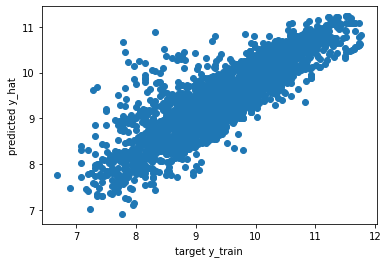

In [75]:
plt.scatter(y_train,y_hat)
plt.xlabel('target y_train')
plt.ylabel('predicted y_hat')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


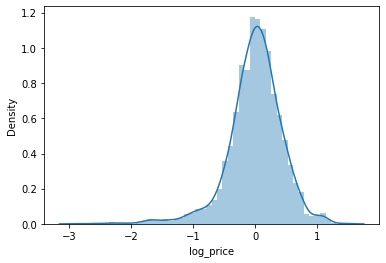

In [76]:
#residual plot 
sns.distplot(y_train-y_hat)

In [77]:
r2=reg.score(x_train,y_train)
r2

0.7415645182486199

In [78]:
#conc:
#the model is explaining 75 percent of the variablity of the data 


In [79]:
#finding weights and bais 
reg.coef_

array([-0.44838367,  0.21092609,  0.01217236,  0.01091936, -0.13381235,
       -0.18243069, -0.05551416, -0.08742151, -0.15127967, -0.10115164,
       -0.19711525, -0.1281566 , -0.16265036, -0.12418232, -0.03326347,
       -0.14940858,  0.31944559])

In [80]:
reg.intercept_

9.413280072375791

In [81]:
reg_summary=pd.DataFrame(inputs.columns.values,columns=['features'])

In [82]:
reg_summary['weights']=reg.coef_
reg_summary

,features,weights
0,Mileage,-0.448384
1,EngineV,0.210926
2,Brand_BMW,0.012172
3,Brand_Mercedes-Benz,0.010919
4,Brand_Mitsubishi,-0.133812
5,Brand_Renault,-0.182431
6,Brand_Toyota,-0.055514
7,Brand_Volkswagen,-0.087422
8,Body_hatch,-0.151280
9,Body_other,-0.101152


In [84]:
#testing 
y_hat_test=reg.predict(x_test)

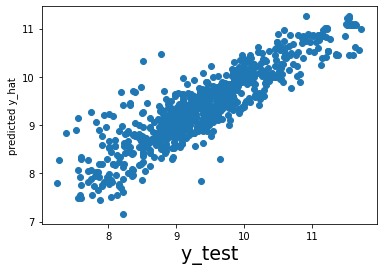

In [87]:
plt.scatter(y_test,y_hat_test)
plt.xlabel(' y_test ',size=19)
plt.ylabel('predicted y_hat')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


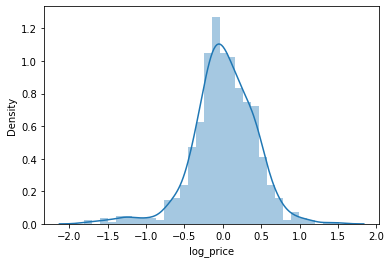

In [89]:
sns.distplot(y_test-y_hat_test)

In [93]:
df_pf=pd.DataFrame(np.exp(y_hat_test),columns=['predictions'])

In [94]:
df_pf.head()

,predictions
0,10650.438709
1,8041.555683
2,6799.069945
3,7606.977689
4,11309.799759


In [98]:
df_pf['target']=np.exp(y_test)

In [97]:
y_test=y_test.reset_index(drop=True)

In [99]:
df_pf

,predictions,target
0,10650.438709,2300.0
1,8041.555683,13200.0
2,6799.069945,8100.0
3,7606.977689,6400.0
4,11309.799759,9150.0
...,...,...
769,14874.949923,29500.0
770,5735.556226,5300.0
771,13623.775492,18300.0
772,28096.133846,68500.0


In [100]:
df_pf['residual']=df_pf['target']-df_pf['predictions']

In [101]:
df_pf.head()

,predictions,target,residual
0,10650.438709,2300.0,-8350.438709
1,8041.555683,13200.0,5158.444317
2,6799.069945,8100.0,1300.930055
3,7606.977689,6400.0,-1206.977689
4,11309.799759,9150.0,-2159.799759


In [102]:
df_pf['differences%']=np.absolute(df_pf['residual']/df_pf['target']*100)

In [103]:
df_pf.head()

,predictions,target,residual,differences%
0,10650.438709,2300.0,-8350.438709,363.062553
1,8041.555683,13200.0,5158.444317,39.079124
2,6799.069945,8100.0,1300.930055,16.060865
3,7606.977689,6400.0,-1206.977689,18.859026
4,11309.799759,9150.0,-2159.799759,23.604369


In [104]:
df_pf.describe()

,predictions,target,residual,differences%
count,774.000000,774.000000,774.000000,774.000000
mean,16170.746881,18612.010504,2441.263622,33.814041
std,13742.956902,20953.006281,10835.145339,48.272151
min,1284.843010,1400.000000,-29171.365746,0.056793
25%,7489.039002,6999.250000,-2013.351405,11.277214
50%,11561.730997,11500.000000,150.474574,23.239276
75%,19726.158072,20500.000000,3293.698161,39.023878
max,77447.771561,124000.000000,80642.598057,507.418465
